In [19]:
import pickle
import utils
import numpy as np
file_name = "../sim_paths_random.pkl"
with open(file_name,'rb') as f:
     M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)

In [14]:
average_cost_M

array([0.34055123, 0.3409828 , 0.34140651, 0.34067464, 0.34177809,
       0.34013156, 0.34145917, 0.34037214, 0.34091963, 0.34017121,
       0.34019821, 0.31217034, 0.28115801, 0.27184236])

In [15]:
average_queue_M

array([1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.27183, 2.38958, 5.67114])

In [16]:
W

array([[0.20905745, 0.56418628, 0.27388864, 0.04863301],
       [0.1793404 , 0.64312121, 0.2053665 , 0.01891596],
       [0.25420689, 0.43775471, 0.52809553, 0.3028399 ],
       [0.16042444, 0.72461073, 0.43431309, 0.20905745]])

In [9]:
file_name = "../sim_paths_spatial.pkl"
with open(file_name,'rb') as f:
     M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)

In [10]:
average_cost_M

array([0.83282685, 0.83732072, 0.83419036, 0.835368  , 0.83278013,
       0.83464947, 0.83331526, 0.83311899, 0.69307059, 0.69157196,
       0.48354492, 0.36438566, 0.27453956, 0.25201466])

In [11]:
average_queue_M

array([ 1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
        1.     ,  1.     ,  1.23738,  1.23768,  1.82937,  2.73826,
        5.31158, 10.41673])

In [34]:
W

array([[0.20905745, 0.56418628, 0.27388864, 0.04863301],
       [0.1793404 , 0.64312121, 0.2053665 , 0.01891596],
       [0.25420689, 0.43775471, 0.52809553, 0.3028399 ],
       [0.16042444, 0.72461073, 0.43431309, 0.20905745]])

In [31]:
def generate_weights(N_grid, is_spatial = 1):
    Weights = np.zeros(shape=(N_grid,N_grid))
    if is_spatial:
        X = np.arange(0.5,N_grid,1)
        Y = np.arange(0.5,N_grid,1)
        cell_locs = []
        for i in range(N_grid):
            for j in range(N_grid):
                cell_locs.append([X[i],Y[j]])
        N_cells = N_grid*N_grid
        Weights = np.zeros(shape=(N_cells,N_cells))

        for i in range(N_cells):
            for j in range(N_cells):
                Weights[i,j] = np.sqrt((cell_locs[i][0] - cell_locs[j][0])**2 + (cell_locs[i][1] - cell_locs[j][1])**2)
        print(Weights)
    else:
        rand_weights = np.random.rand(N_grid, N_grid)*4 + 1.5
        N_cells = N_grid*N_grid
        for counter in range(N_cells):
            for i in range(N_grid):
                for j in range(N_grid):
                    for k in range(N_grid):
                        rand_weights[i,j] = min(rand_weights[i,j],rand_weights[i,k] + rand_weights[k,j] )
        print(rand_weights)
        Weights = rand_weights
    return(Weights)

In [32]:
generate_weights(4, 0)

[[4.18865956 3.54257784 1.75048016 4.18843257]
 [5.11454783 2.70317657 4.00587941 3.11514975]
 [2.4381794  1.79209768 2.14843333 2.43795241]
 [2.68680295 4.9235435  3.99534232 4.86506095]]


array([[4.18865956, 3.54257784, 1.75048016, 4.18843257],
       [5.11454783, 2.70317657, 4.00587941, 3.11514975],
       [2.4381794 , 1.79209768, 2.14843333, 2.43795241],
       [2.68680295, 4.9235435 , 3.99534232, 4.86506095]])

In [27]:
(0.25)/0.75

0.3333333333333333

In [35]:
generate_weights(4, 1)

[[0.         1.         2.         3.         1.         1.41421356
  2.23606798 3.16227766 2.         2.23606798 2.82842712 3.60555128
  3.         3.16227766 3.60555128 4.24264069]
 [1.         0.         1.         2.         1.41421356 1.
  1.41421356 2.23606798 2.23606798 2.         2.23606798 2.82842712
  3.16227766 3.         3.16227766 3.60555128]
 [2.         1.         0.         1.         2.23606798 1.41421356
  1.         1.41421356 2.82842712 2.23606798 2.         2.23606798
  3.60555128 3.16227766 3.         3.16227766]
 [3.         2.         1.         0.         3.16227766 2.23606798
  1.41421356 1.         3.60555128 2.82842712 2.23606798 2.
  4.24264069 3.60555128 3.16227766 3.        ]
 [1.         1.41421356 2.23606798 3.16227766 0.         1.
  2.         3.         1.         1.41421356 2.23606798 3.16227766
  2.         2.23606798 2.82842712 3.60555128]
 [1.41421356 1.         1.41421356 2.23606798 1.         0.
  1.         2.         1.41421356 1.         1.4

array([[0.        , 1.        , 2.        , 3.        , 1.        ,
        1.41421356, 2.23606798, 3.16227766, 2.        , 2.23606798,
        2.82842712, 3.60555128, 3.        , 3.16227766, 3.60555128,
        4.24264069],
       [1.        , 0.        , 1.        , 2.        , 1.41421356,
        1.        , 1.41421356, 2.23606798, 2.23606798, 2.        ,
        2.23606798, 2.82842712, 3.16227766, 3.        , 3.16227766,
        3.60555128],
       [2.        , 1.        , 0.        , 1.        , 2.23606798,
        1.41421356, 1.        , 1.41421356, 2.82842712, 2.23606798,
        2.        , 2.23606798, 3.60555128, 3.16227766, 3.        ,
        3.16227766],
       [3.        , 2.        , 1.        , 0.        , 3.16227766,
        2.23606798, 1.41421356, 1.        , 3.60555128, 2.82842712,
        2.23606798, 2.        , 4.24264069, 3.60555128, 3.16227766,
        3.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 0.        ,
        1.        , 2.        , 

In [40]:
N = 4

N = N*N

pmf_cust = np.random.rand(N)
pmf_cust = pmf_cust/(np.sum(pmf_cust))

In [41]:
print(pmf_cust)

[0.0984816  0.0241875  0.02478969 0.06393679 0.0755387  0.01249855
 0.00355011 0.06088877 0.05379045 0.11332627 0.03576401 0.09536985
 0.09633782 0.07857966 0.10783264 0.0551276 ]


In [39]:
pmf_cust.shape

(16, 1)

### Plots

In [1]:
import numpy as np
from scipy.stats import rv_discrete
from matplotlib import pyplot as plt
import cvxpy as cp
import pickle
# import gurobipy

In [2]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 1):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv)
    print("\nFluid Solution:\n")
    print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M)

Expected cost for c = 0 case: 2.703
Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-03
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 4 columns and 8 nonzeros
Model fingerprint: 0xe1753d8c
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-01, 8e-01]
Presolve removed 4 rows and 4 columns
Presolve time: 0.03s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.6025060e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.04 seconds (0.00 work units)
Optimal objective  2.602506012e+00
Objective Value: 2.60
x:  [[0.60021875 0.16715862]
 [0.23262263 0.        ]]

Fluid Solu

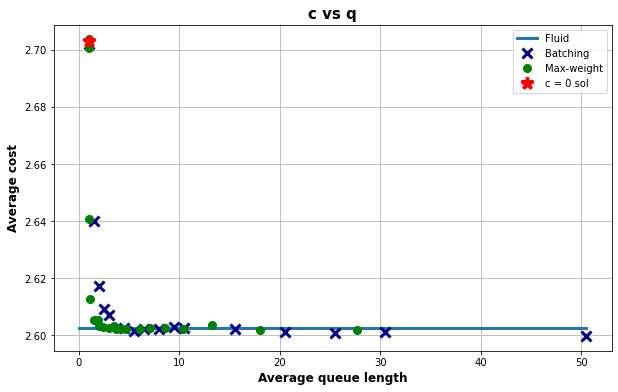

In [4]:
plot_from_sim_paths("../sim_paths_random_2.pkl")